## 데이터 준비

In [1]:
### 구글 서버와 내 드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# 현재 작업 경로 변경하기
%cd '/content/drive/MyDrive/KDT/정형데이터분석시각화'

/content/drive/MyDrive/KDT/정형데이터분석시각화


In [3]:
# 필요한 라이브러리 임폴트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
### 데이터 불러오기

# file 경로 설정하기
file_name = 'used_car.csv'

# csv file --> pd.read_csv() --> dataframe 자료형 변환
df = pd.read_csv(file_name, index_col=0)

# 결과 확인하기 --> 모양(shape), 데이터에 대한 전반적인 정보
print(f'데이터의 모양 : {df.shape}')
print('-'*80)
print('데이터에 대한 전반적인 정보 :')
df.info()

데이터의 모양 : (6019, 13)
--------------------------------------------------------------------------------
데이터에 대한 전반적인 정보 :
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5876 non-null   object 
 10  Seats              5977 non-null   float64
 11  New_Price          824 non-null    object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage:

## 데이터 전처리

### 누락 데이터 처리

In [5]:
### 각 컬럼별 누락 데이터의 수 확인 --> isnull().sum()
print(df.isnull().sum())

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                 143
Seats                  42
New_Price            5195
Price                   0
dtype: int64


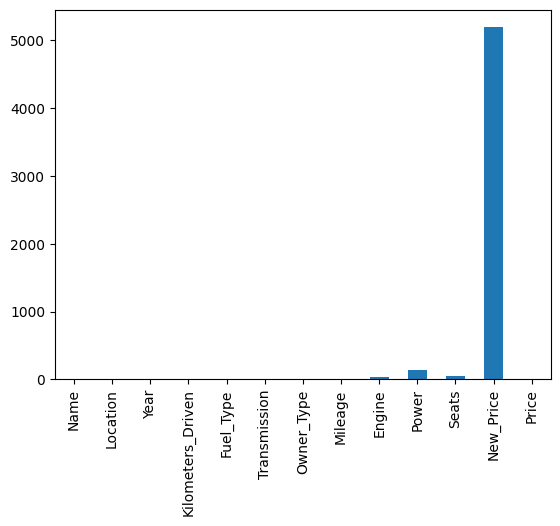

In [6]:
df.isnull().sum().plot(kind='bar')
plt.show()

In [7]:
### New_Price 컬럼 --> 제거
cleaned_df = df.drop(columns=['New_Price'])

# 결과 확인하기
cleaned_df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65


In [8]:
### 불필요한 컬럼 --> Owner_Type 제거
cleaned_df.drop(columns=['Owner_Type'], inplace=True)

# 결과 확인하기
cleaned_df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,28.4 kmpl,1248 CC,74 bhp,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,24.4 kmpl,1120 CC,71 bhp,5.0,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,14.0 kmpl,2498 CC,112 bhp,8.0,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65


In [9]:
### Mileage, Engine, Power, Seats 컬럼 --> 누락 데이터가 있는 행 제거
cleaned_df.dropna(subset=['Mileage', 'Engine', 'Power', 'Seats'], inplace=True)

# 결과 확인하기
cleaned_df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,28.4 kmpl,1248 CC,74 bhp,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,24.4 kmpl,1120 CC,71 bhp,5.0,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,14.0 kmpl,2498 CC,112 bhp,8.0,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65


In [10]:
### index --> reset --> df.reset_index(drop=True, inlplace=True)
cleaned_df.reset_index(drop=True, inplace=True)

# 결과 확인하기
cleaned_df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...
5867,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,28.4 kmpl,1248 CC,74 bhp,5.0,4.75
5868,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,24.4 kmpl,1120 CC,71 bhp,5.0,4.00
5869,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,14.0 kmpl,2498 CC,112 bhp,8.0,2.90
5870,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65


### 단위 제거

In [11]:
'''
1. 목표 : 값에 단위가 붙어있는 컬럼에 대해서 단위 제거
2. 대상 컬럼 : Mileage, Engine, Power
3. 예시) 28.4 kmpl --> 28.4
4. 방법 : 공백을 기준으로 문자열 split --> "28.4 kmpl".split(' ')[0]
'''

# Mileage 컬럼
cleaned_df.Mileage = cleaned_df.Mileage.apply(lambda x : x.split()[0])

# Engine 컬럼
cleaned_df.Engine = cleaned_df.Engine.apply(lambda x : x.split()[0])

# Power 컬럼
cleaned_df.Power = cleaned_df.Power.apply(lambda x : x.split()[0])

# 결과 확인하기
cleaned_df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,26.6,998,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,19.67,1582,126.2,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,18.2,1199,88.7,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,20.77,1248,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,15.2,1968,140.8,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...
5867,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,28.4,1248,74,5.0,4.75
5868,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,24.4,1120,71,5.0,4.00
5869,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,14.0,2498,112,8.0,2.90
5870,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,18.9,998,67.1,5.0,2.65


In [12]:
### 단위 제거 후 기본 정보 확인
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5872 entries, 0 to 5871
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5872 non-null   object 
 1   Location           5872 non-null   object 
 2   Year               5872 non-null   int64  
 3   Kilometers_Driven  5872 non-null   int64  
 4   Fuel_Type          5872 non-null   object 
 5   Transmission       5872 non-null   object 
 6   Mileage            5872 non-null   object 
 7   Engine             5872 non-null   object 
 8   Power              5872 non-null   object 
 9   Seats              5872 non-null   float64
 10  Price              5872 non-null   float64
dtypes: float64(2), int64(2), object(7)
memory usage: 504.8+ KB


#### 자료형 변환

In [13]:
'''
1. 목표 : Mileage, Engine, Power 컬럼의 자료형 --> float 변환
2. 사용함수 : df.astype({col1:'float'})
'''

# astype() 함수 적용
cleaned_df = cleaned_df.astype({'Mileage':'float', 'Engine':'float', 'Power':'float'})

# 결과 확인하기 --> info() 사용
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5872 entries, 0 to 5871
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5872 non-null   object 
 1   Location           5872 non-null   object 
 2   Year               5872 non-null   int64  
 3   Kilometers_Driven  5872 non-null   int64  
 4   Fuel_Type          5872 non-null   object 
 5   Transmission       5872 non-null   object 
 6   Mileage            5872 non-null   float64
 7   Engine             5872 non-null   float64
 8   Power              5872 non-null   float64
 9   Seats              5872 non-null   float64
 10  Price              5872 non-null   float64
dtypes: float64(5), int64(2), object(4)
memory usage: 504.8+ KB


### 이상치 처리

In [14]:
### 수치형 데이터 --> 요약 통계량 확인
cleaned_df.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,5872.000000,5.872000e+03,5872.000000,5872.000000,5872.000000,5872.000000,5872.000000
mean,2013.477691,5.831700e+04,18.277839,1625.745572,113.276894,5.283719,9.603919
std,3.164568,9.216941e+04,4.365657,601.641783,53.881892,0.805081,11.249453
min,1998.000000,1.710000e+02,0.000000,624.000000,34.200000,2.000000,0.440000
25%,2012.000000,3.342250e+04,15.260000,1198.000000,75.000000,5.000000,3.517500
50%,2014.000000,5.260900e+04,18.200000,1495.500000,97.700000,5.000000,5.750000
75%,2016.000000,7.240275e+04,21.100000,1991.000000,138.100000,5.000000,10.000000
max,2019.000000,6.500000e+06,33.540000,5998.000000,560.000000,10.000000,160.000000


Year 컬럼 이상치 시각화


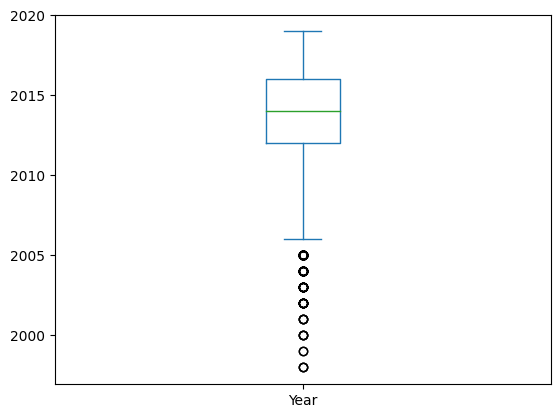

--------------------------------------------------------------------------------
Kilometers_Driven 컬럼 이상치 시각화


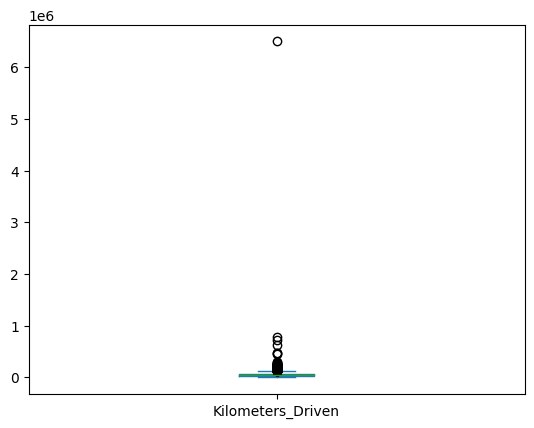

--------------------------------------------------------------------------------
Mileage 컬럼 이상치 시각화


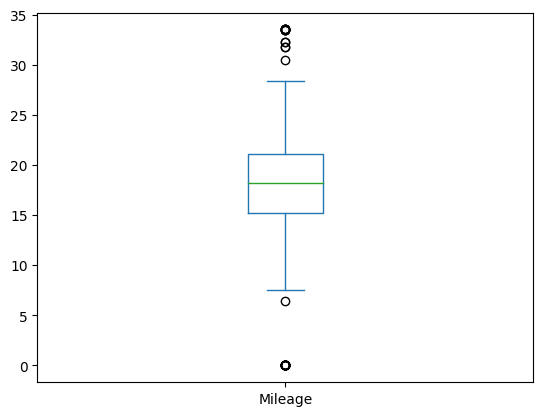

--------------------------------------------------------------------------------
Engine 컬럼 이상치 시각화


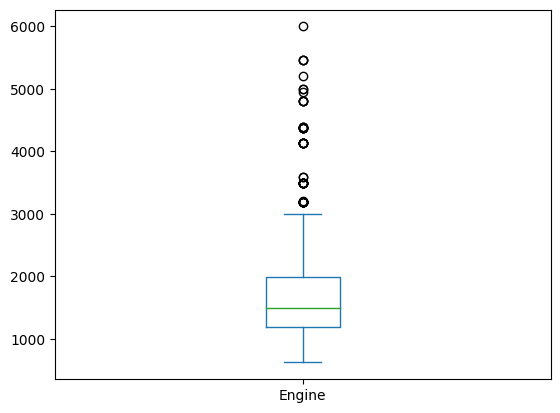

--------------------------------------------------------------------------------
Power 컬럼 이상치 시각화


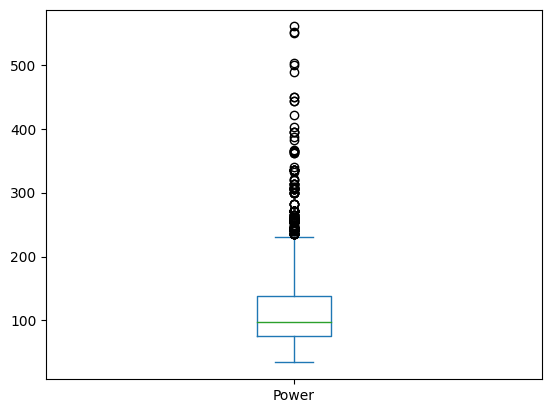

--------------------------------------------------------------------------------
Seats 컬럼 이상치 시각화


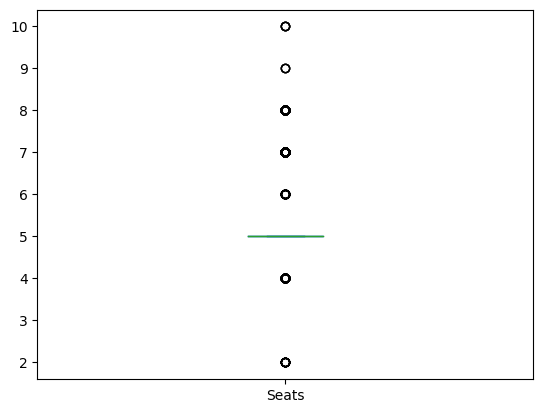

--------------------------------------------------------------------------------
Price 컬럼 이상치 시각화


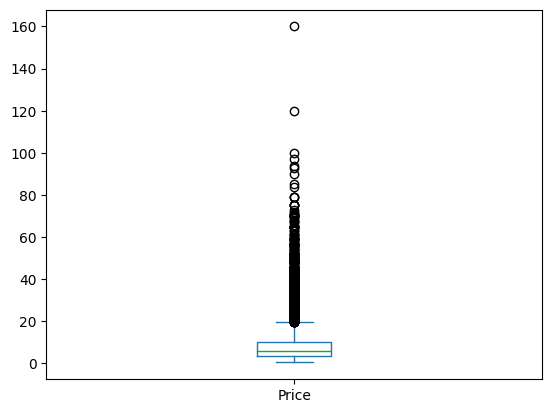

In [15]:
### boxplot을 이용한 이상치 시각화

# Year 컬럼
print('Year 컬럼 이상치 시각화')
cleaned_df.Year.plot(kind='box')
plt.show()

print('-'*80)

# Kilometers_Driven 컬럼
print('Kilometers_Driven 컬럼 이상치 시각화')
cleaned_df.Kilometers_Driven.plot(kind='box')
plt.show()

print('-'*80)

# Mileage 컬럼
print('Mileage 컬럼 이상치 시각화')
cleaned_df.Mileage.plot(kind='box')
plt.show()

print('-'*80)

# Engine 컬럼
print('Engine 컬럼 이상치 시각화')
cleaned_df.Engine.plot(kind='box')
plt.show()

print('-'*80)

# Power 컬럼
print('Power 컬럼 이상치 시각화')
cleaned_df.Power.plot(kind='box')
plt.show()

print('-'*80)

# Seats 컬럼
print('Seats 컬럼 이상치 시각화')
cleaned_df.Seats.plot(kind='box')
plt.show()

print('-'*80)

# Price 컬럼
print('Price 컬럼 이상치 시각화')
cleaned_df.Price.plot(kind='box')
plt.show()

#### Year 컬럼

In [16]:
### Year 컬럼에 대한 이상치 판단 --> IQR

'''
1. IQR = Q3 - Q1
2. 정상 범위의 최소 : min = Q1 - (1.5 * IQR)
3. 정상 범위의 최대 : max = Q3 + (1.5 * IQR)
'''

# IQR --> quantile(q=)
Q1 = cleaned_df.Year.quantile(q=0.25)
Q3 = cleaned_df.Year.quantile(q=0.75)
IQR = Q3 - Q1
print(f'IQR = {IQR}')

print('-'*80)

# 정상 범위의 최소 : min
min = Q1 - (1.5 * IQR)
print(f'min = {min}')

print('-'*80)

# 정상 범위의 최대 : max
max = Q3 + (1.5 * IQR)
print(f'max = {max}')

IQR = 4.0
--------------------------------------------------------------------------------
min = 2006.0
--------------------------------------------------------------------------------
max = 2022.0


Int64Index([ 215,  263,  302,  323,  338,  351,  402,  472,  479,  517,
            ...
            5518, 5577, 5702, 5749, 5751, 5770, 5772, 5781, 5811, 5839],
           dtype='int64', length=105)


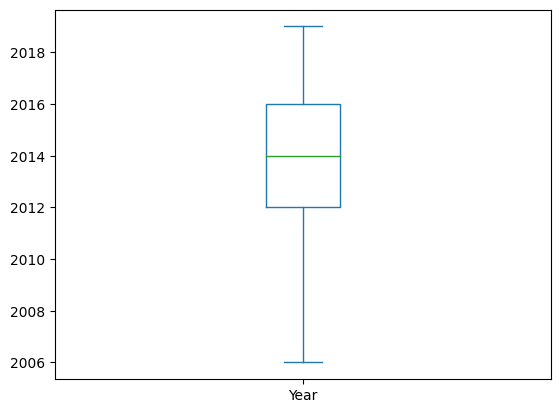

In [17]:
### Year 컬럼 --> boolean 배열을 이용해서 2006년 미만의 행 추출 --> 제거

outlier_year_index = cleaned_df.loc[cleaned_df.Year<2006, :].index
print(outlier_year_index)

# drop --> Year 컬럼 --> 이상치 제거
cleaned_df.drop(index=outlier_year_index, inplace=True)

# 결과 확인하기
cleaned_df.Year.plot(kind='box')
plt.show()

### 4/6 실습

#### Kilometers_Driven 컬럼

In [18]:
### Kilometers_Driven 컬럼에 대한 이상치 판단(1) --> IQR

'''
1. IQR = Q3 - Q1
2. 정상 범위의 최소 : min = Q1 - (1.5 * IQR)
3. 정상 범위의 최대 : max = Q3 + (1.5 * IQR)
'''

# IQR --> quantile(q=)
Q1 = cleaned_df.Kilometers_Driven.quantile(q=0.25)
Q3 = cleaned_df.Kilometers_Driven.quantile(q=0.75)
IQR = Q3 - Q1
print(f'IQR = {IQR}')

print('-'*80)

# 정상 범위의 최소 : min
min = Q1 - (1.5 * IQR)
print(f'min = {min}')

print('-'*80)

# 정상 범위의 최대 : max
max = Q3 + (1.5 * IQR)
print(f'max = {max}')

IQR = 39000.0
--------------------------------------------------------------------------------
min = -25500.0
--------------------------------------------------------------------------------
max = 130500.0


Int64Index([  29,   64,   76,  149,  159,  160,  176,  221,  241,  251,
            ...
            5504, 5595, 5659, 5661, 5693, 5699, 5709, 5711, 5729, 5807],
           dtype='int64', length=188)


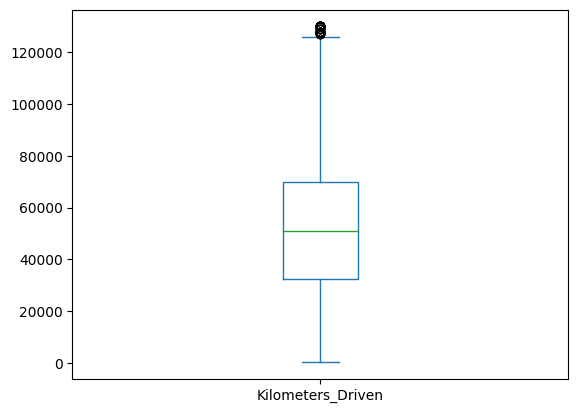

In [19]:
### Kilometers_Driven 컬럼 --> boolean 배열을 이용해서 130500보다 큰 행 추출 --> 제거

outlier_Kilometers_Driven_index = cleaned_df.loc[cleaned_df.Kilometers_Driven>130500.0, :].index
print(outlier_Kilometers_Driven_index)

# drop --> Kilometers_Driven 컬럼 --> 이상치 제거(1)
cleaned_df.drop(index=outlier_Kilometers_Driven_index, inplace=True)

# 결과 확인하기
cleaned_df.Kilometers_Driven.plot(kind='box')
plt.show()

In [20]:
### Kilometers_Driven --> 이상치 제거 --> 요약 통계량
cleaned_df.Kilometers_Driven.describe()

count      5579.000000
mean      52549.477326
std       26548.406092
min         171.000000
25%       32520.500000
50%       51000.000000
75%       69945.000000
max      130002.000000
Name: Kilometers_Driven, dtype: float64

In [21]:
### Kilometers_Driven 컬럼에 대한 이상치 판단(2) --> IQR

'''
1. IQR = Q3 - Q1
2. 정상 범위의 최소 : min = Q1 - (1.5 * IQR)
3. 정상 범위의 최대 : max = Q3 + (1.5 * IQR)
'''

# IQR --> quantile(q=)
Q1 = cleaned_df.Kilometers_Driven.quantile(q=0.25)
Q3 = cleaned_df.Kilometers_Driven.quantile(q=0.75)
IQR = Q3 - Q1
print(f'IQR = {IQR}')

print('-'*80)

# 정상 범위의 최소 : min
min = Q1 - (1.5 * IQR)
print(f'min = {min}')

print('-'*80)

# 정상 범위의 최대 : max
max = Q3 + (1.5 * IQR)
print(f'max = {max}')

IQR = 37424.5
--------------------------------------------------------------------------------
min = -23616.25
--------------------------------------------------------------------------------
max = 126081.75


Int64Index([ 115,  349,  471,  519,  606,  888, 1041, 1574, 1686, 2234, 2486,
            2546, 2598, 2869, 3020, 3122, 3336, 3343, 3386, 3616, 3684, 3730,
            3794, 4177, 4313, 4509, 4653, 4748, 5361, 5408],
           dtype='int64')


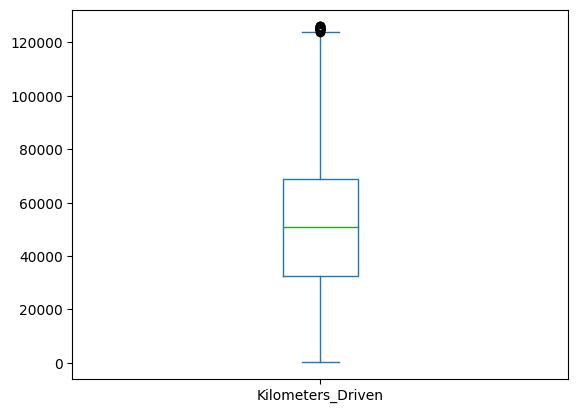

In [22]:
### Kilometers_Driven 컬럼 --> boolean 배열을 이용해서 126082보다 큰 행 추출 --> 제거

outlier_Kilometers_Driven_index = cleaned_df.loc[cleaned_df.Kilometers_Driven>126082.0, :].index
print(outlier_Kilometers_Driven_index)

# drop --> Kilometers_Driven 컬럼 --> 이상치 제거(2)
cleaned_df.drop(index=outlier_Kilometers_Driven_index, inplace=True)

# 결과 확인하기
cleaned_df.Kilometers_Driven.plot(kind='box')
plt.show()

In [23]:
### Kilometers_Driven --> 이상치 2차 제거 --> 요약 통계량
cleaned_df.Kilometers_Driven.describe()

count      5549.000000
mean      52136.151739
std       26016.277986
min         171.000000
25%       32400.000000
50%       51000.000000
75%       69000.000000
max      126000.000000
Name: Kilometers_Driven, dtype: float64

In [24]:
### Kilometers_Driven 컬럼에 대한 이상치 판단(3) --> IQR

'''
1. IQR = Q3 - Q1
2. 정상 범위의 최소 : min = Q1 - (1.5 * IQR)
3. 정상 범위의 최대 : max = Q3 + (1.5 * IQR)
'''

# IQR --> quantile(q=)
Q1 = cleaned_df.Kilometers_Driven.quantile(q=0.25)
Q3 = cleaned_df.Kilometers_Driven.quantile(q=0.75)
IQR = Q3 - Q1
print(f'IQR = {IQR}')

print('-'*80)

# 정상 범위의 최소 : min
min = Q1 - (1.5 * IQR)
print(f'min = {min}')

print('-'*80)

# 정상 범위의 최대 : max
max = Q3 + (1.5 * IQR)
print(f'max = {max}')

IQR = 36600.0
--------------------------------------------------------------------------------
min = -22500.0
--------------------------------------------------------------------------------
max = 123900.0


Int64Index([ 388,  817, 1226, 1234, 1472, 1931, 3189, 3234, 3499, 4164, 4277,
            4279, 4418, 5453, 5483, 5511, 5761],
           dtype='int64')


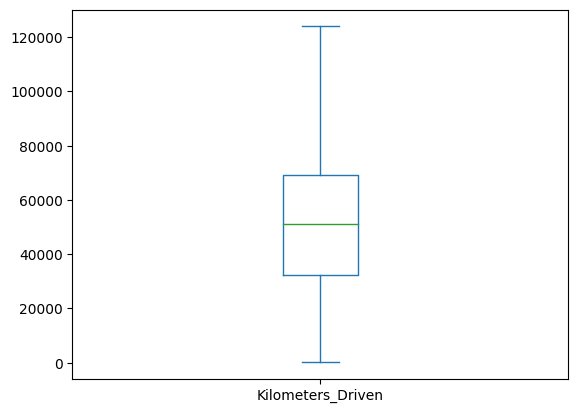

In [25]:
### Kilometers_Driven 컬럼 --> boolean 배열을 이용해서 123900보다 큰 행 추출 --> 제거

outlier_Kilometers_Driven_index = cleaned_df.loc[cleaned_df.Kilometers_Driven>123900.0, :].index
print(outlier_Kilometers_Driven_index)

# drop --> Kilometers_Driven 컬럼 --> 이상치 제거(3)
cleaned_df.drop(index=outlier_Kilometers_Driven_index, inplace=True)

# 결과 확인하기
cleaned_df.Kilometers_Driven.plot(kind='box')
plt.show()

#### Mileage 컬럼

In [26]:
### Mileage 컬럼에 대한 이상치 판단 --> IQR

'''
1. IQR = Q3 - Q1
2. 정상 범위의 최소 : min = Q1 - (1.5 * IQR)
3. 정상 범위의 최대 : max = Q3 + (1.5 * IQR)
'''

# IQR --> quantile(q=)
Q1 = cleaned_df.Mileage.quantile(q=0.25)
Q3 = cleaned_df.Mileage.quantile(q=0.75)
IQR = Q3 - Q1
print(f'IQR = {IQR}')

print('-'*80)

# 정상 범위의 최소 : min
min = Q1 - (1.5 * IQR)
print(f'min = {min}')

print('-'*80)

# 정상 범위의 최대 : max
max = Q3 + (1.5 * IQR)
print(f'max = {max}')

IQR = 5.590000000000002
--------------------------------------------------------------------------------
min = 7.214999999999998
--------------------------------------------------------------------------------
max = 29.575000000000003


Int64Index([  14,   67,  526,  685,  932,  966, 1029, 1273, 1316, 1718, 2605,
            2963, 3011, 3126, 3186, 4124, 4192, 4300, 4571, 4587, 4888, 4894,
            5241, 5640, 5732, 5826, 5864],
           dtype='int64')
Int64Index([1236, 1295, 2009, 2309, 2625, 3036, 3046, 3460, 3768, 4033, 4648,
            5048, 5571, 5790],
           dtype='int64')


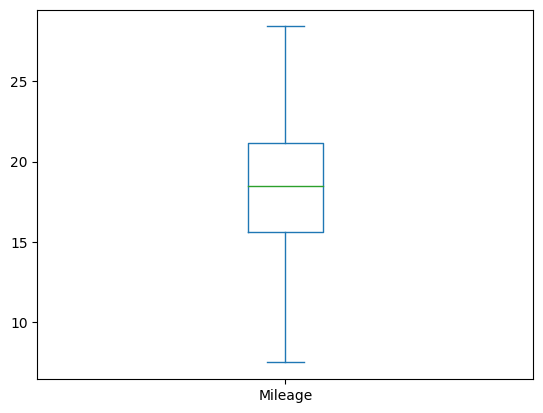

In [27]:
### Mileage 컬럼 --> boolean 배열을 이용해서 7.22 미만 또는 29.58 보다 큰 행 추출 --> 제거

outlier_Mileage_index1 = cleaned_df.loc[cleaned_df.Mileage<7.22, :].index
outlier_Mileage_index2 = cleaned_df.loc[cleaned_df.Mileage>29.58, :].index
print(outlier_Mileage_index1)
print(outlier_Mileage_index2)

# drop --> Mileage 컬럼 --> 이상치 제거
cleaned_df.drop(index=outlier_Mileage_index1, inplace=True)
cleaned_df.drop(index=outlier_Mileage_index2, inplace=True)

# 결과 확인하기
cleaned_df.Mileage.plot(kind='box')
plt.show()

#### Engine 컬럼

In [28]:
### 이상치 제거 전 요약 통계량 확인
cleaned_df.Engine.describe()

count    5491.000000
mean     1612.267347
std       592.040120
min       624.000000
25%      1198.000000
50%      1493.000000
75%      1968.000000
max      5998.000000
Name: Engine, dtype: float64

In [29]:
### Engine 컬럼에 대한 이상치 판단 --> IQR

# IQR --> quantile(q=)
Q1 = cleaned_df.Engine.quantile(q=0.25)
Q3 = cleaned_df.Engine.quantile(q=0.75)
IQR = Q3 - Q1
print(f'IQR = {IQR}')

print('-'*80)

# 정상 범위의 최소 : min
min = Q1 - (1.5 * IQR)
print(f'min = {min}')

print('-'*80)

# 정상 범위의 최대 : max
max = Q3 + (1.5 * IQR)
print(f'max = {max}')

IQR = 770.0
--------------------------------------------------------------------------------
min = 43.0
--------------------------------------------------------------------------------
max = 3123.0


Int64Index([  70,  147,  442,  567,  570,  671,  681,  772,  780, 1008, 1045,
            1062, 1314, 1389, 1552, 1678, 1882, 2048, 2593, 2898, 2948, 2983,
            2997, 3032, 3112, 3158, 3254, 3487, 3933, 4028, 4118, 4232, 4276,
            4338, 4446, 4512, 4575, 4602, 4700, 4747, 4781, 4813, 4959, 5145,
            5190, 5208, 5281, 5283, 5306, 5385, 5465, 5589, 5742, 5775],
           dtype='int64')


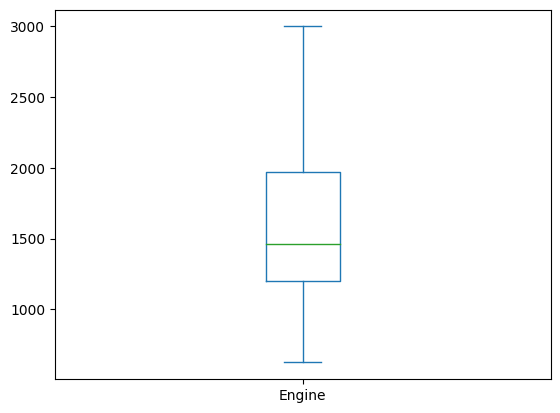

In [30]:
### Engine 컬럼 --> boolean 배열을 이용해서 3123 보다 큰 행 추출 --> 제거

outlier_Engine_index = cleaned_df.loc[cleaned_df.Engine>3123.0, :].index
print(outlier_Engine_index)

# drop --> Engine 컬럼 --> 이상치 제거
cleaned_df.drop(index=outlier_Engine_index, inplace=True)

# 결과 확인하기
cleaned_df.Engine.plot(kind='box')
plt.show()

#### Power 컬럼

In [31]:
### 이상치 제거 전 요약 통계량 확인
cleaned_df.Power.describe()

count    5437.000000
mean      111.709033
std        49.362160
min        34.200000
25%        76.900000
50%        93.700000
75%       138.080000
max       444.000000
Name: Power, dtype: float64

In [32]:
### Power 컬럼에 대한 이상치 판단 --> IQR

# IQR --> quantile(q=)
Q1 = cleaned_df.Power.quantile(q=0.25)
Q3 = cleaned_df.Power.quantile(q=0.75)
IQR = Q3 - Q1
print(f'IQR = {IQR}')

print('-'*80)

# 정상 범위의 최소 : min
min = Q1 - (1.5 * IQR)
print(f'min = {min}')

print('-'*80)

# 정상 범위의 최대 : max
max = Q3 + (1.5 * IQR)
print(f'max = {max}')

IQR = 61.18000000000001
--------------------------------------------------------------------------------
min = -14.870000000000005
--------------------------------------------------------------------------------
max = 229.85000000000002


Int64Index([  38,  100,  104,  130,  143,  163,  209,  253,  260,  271,
            ...
            5563, 5601, 5620, 5634, 5641, 5662, 5726, 5782, 5800, 5861],
           dtype='int64', length=191)


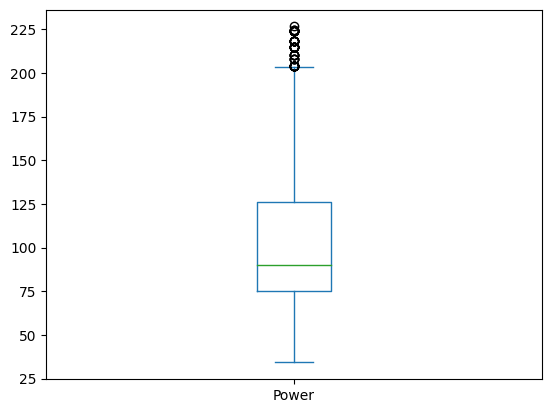

In [33]:
### Power 컬럼 --> boolean 배열을 이용해서 229.85 보다 큰 행 추출 --> 제거

outlier_Power_index = cleaned_df.loc[cleaned_df.Power>229.85, :].index
print(outlier_Power_index)

# drop --> Power 컬럼 --> 이상치 제거
cleaned_df.drop(index=outlier_Power_index, inplace=True)

# 결과 확인하기
cleaned_df.Power.plot(kind='box')
plt.show()

In [34]:
### 이상치 1차 제거 후 요약 통계량 확인
cleaned_df.Power.describe()

count    5246.000000
mean      106.221809
std        40.394507
min        34.200000
25%        74.970000
50%        89.840000
75%       126.320000
max       226.600000
Name: Power, dtype: float64

In [35]:
### Power 컬럼에 대한 이상치 판단(2) --> IQR

# IQR --> quantile(q=)
Q1 = cleaned_df.Power.quantile(q=0.25)
Q3 = cleaned_df.Power.quantile(q=0.75)
IQR = Q3 - Q1
print(f'IQR = {IQR}')

print('-'*80)

# 정상 범위의 최소 : min
min = Q1 - (1.5 * IQR)
print(f'min = {min}')

print('-'*80)

# 정상 범위의 최대 : max
max = Q3 + (1.5 * IQR)
print(f'max = {max}')

IQR = 51.349999999999994
--------------------------------------------------------------------------------
min = -2.0549999999999926
--------------------------------------------------------------------------------
max = 203.34499999999997


Int64Index([  84,  371,  386,  392,  401,  518,  539,  684,  726,  859,  959,
            1005, 1075, 1103, 1145, 1200, 1254, 1279, 1435, 1499, 1582, 1595,
            1623, 1861, 1953, 2052, 2082, 2136, 2200, 2491, 2611, 2718, 2855,
            3054, 3241, 3614, 3626, 3629, 3829, 3835, 3925, 4031, 4135, 4162,
            4182, 4211, 4417, 4503, 4541, 4843, 4867, 4911, 4953, 5121, 5149,
            5172, 5475, 5553, 5606, 5650, 5704, 5721, 5777, 5819, 5859],
           dtype='int64')


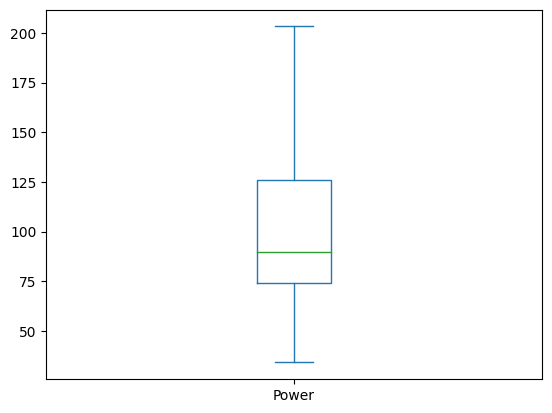

In [36]:
### Power 컬럼 --> boolean 배열을 이용해서 203.35 보다 큰 행 추출 --> 제거

outlier_Power_index = cleaned_df.loc[cleaned_df.Power>203.35, :].index
print(outlier_Power_index)

# drop --> Power 컬럼 --> 이상치 제거(2)
cleaned_df.drop(index=outlier_Power_index, inplace=True)

# 결과 확인하기
cleaned_df.Power.plot(kind='box')
plt.show()

In [37]:
### 이상치 제거 후 전체 데이터 info 확인
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5181 entries, 0 to 5871
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5181 non-null   object 
 1   Location           5181 non-null   object 
 2   Year               5181 non-null   int64  
 3   Kilometers_Driven  5181 non-null   int64  
 4   Fuel_Type          5181 non-null   object 
 5   Transmission       5181 non-null   object 
 6   Mileage            5181 non-null   float64
 7   Engine             5181 non-null   float64
 8   Power              5181 non-null   float64
 9   Seats              5181 non-null   float64
 10  Price              5181 non-null   float64
dtypes: float64(5), int64(2), object(4)
memory usage: 485.7+ KB


In [38]:
### index --> reset --> df.reset_index(drop=True, inplace=True)
cleaned_df.reset_index(drop=True, inplace=True)

# 결과 확인
cleaned_df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,26.60,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,15.20,1968.0,140.80,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...
5176,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,28.40,1248.0,74.00,5.0,4.75
5177,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,24.40,1120.0,71.00,5.0,4.00
5178,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,14.00,2498.0,112.00,8.0,2.90
5179,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,18.90,998.0,67.10,5.0,2.65


### Feature Engineering

#### 자료형이 object인 컬럼의 고유값 개수 확인

##### Name 컬럼

In [39]:
### Name 컬럼 --> 항목별 개수 확인
cleaned_df.Name = cleaned_df.Name.apply(lambda x : x.split()[0])

# 결과 확인하기
cleaned_df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Mileage,Engine,Power,Seats,Price
0,Maruti,Mumbai,2010,72000,CNG,Manual,26.60,998.0,58.16,5.0,1.75
1,Hyundai,Pune,2015,41000,Diesel,Manual,19.67,1582.0,126.20,5.0,12.50
2,Honda,Chennai,2011,46000,Petrol,Manual,18.20,1199.0,88.70,5.0,4.50
3,Maruti,Chennai,2012,87000,Diesel,Manual,20.77,1248.0,88.76,7.0,6.00
4,Audi,Coimbatore,2013,40670,Diesel,Automatic,15.20,1968.0,140.80,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...
5176,Maruti,Delhi,2014,27365,Diesel,Manual,28.40,1248.0,74.00,5.0,4.75
5177,Hyundai,Jaipur,2015,100000,Diesel,Manual,24.40,1120.0,71.00,5.0,4.00
5178,Mahindra,Jaipur,2012,55000,Diesel,Manual,14.00,2498.0,112.00,8.0,2.90
5179,Maruti,Kolkata,2013,46000,Petrol,Manual,18.90,998.0,67.10,5.0,2.65


In [40]:
### Name 컬럼 --> 회사 이름의 항목별 개수 확인
cleaned_df.Name.value_counts()

Maruti           1092
Hyundai          1018
Honda             576
Toyota            318
Volkswagen        307
Ford              256
Mahindra          244
Mercedes-Benz     206
BMW               169
Audi              168
Tata              160
Skoda             156
Renault           139
Chevrolet         116
Nissan             84
Land               39
Mini               26
Jaguar             20
Mitsubishi         20
Fiat               19
Jeep               15
Volvo              14
Datsun             13
Force               3
ISUZU               2
Isuzu               1
Name: Name, dtype: int64

In [41]:
### 회사 이름이 'ISUZU' 인 데이터 확인 --> loc 인덱서 + boolean 배열
cleaned_df.loc[cleaned_df.Name=='ISUZU', :]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Mileage,Engine,Power,Seats,Price
3122,ISUZU,Coimbatore,2018,20422,Diesel,Manual,12.4,2499.0,134.0,5.0,16.09
5146,ISUZU,Jaipur,2017,25000,Diesel,Manual,12.4,2499.0,134.0,5.0,8.00


In [42]:
### 회사 이름이 'Isuzu' 인 데이터 확인 --> loc 인덱서 + boolean 배열
cleaned_df.loc[cleaned_df.Name=='Isuzu', :]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Mileage,Engine,Power,Seats,Price
2499,Isuzu,Jaipur,2017,34429,Diesel,Automatic,13.8,2999.0,174.57,7.0,20.0


In [43]:
### 'Isuzu' --> 'ISUZU'로 변경
cleaned_df.loc[cleaned_df.Name=='Isuzu', 'Name'] = 'ISUZU'

# 결과 확인하기
cleaned_df.loc[cleaned_df.Name=='ISUZU', :]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Mileage,Engine,Power,Seats,Price
2499,ISUZU,Jaipur,2017,34429,Diesel,Automatic,13.8,2999.0,174.57,7.0,20.00
3122,ISUZU,Coimbatore,2018,20422,Diesel,Manual,12.4,2499.0,134.00,5.0,16.09
5146,ISUZU,Jaipur,2017,25000,Diesel,Manual,12.4,2499.0,134.00,5.0,8.00


In [44]:
### Name 컬럼 --> 회사 이름의 항목별 개수 확인
cleaned_df.Name.value_counts()

Maruti           1092
Hyundai          1018
Honda             576
Toyota            318
Volkswagen        307
Ford              256
Mahindra          244
Mercedes-Benz     206
BMW               169
Audi              168
Tata              160
Skoda             156
Renault           139
Chevrolet         116
Nissan             84
Land               39
Mini               26
Mitsubishi         20
Jaguar             20
Fiat               19
Jeep               15
Volvo              14
Datsun             13
ISUZU               3
Force               3
Name: Name, dtype: int64

##### Location 컬럼

In [45]:
### Location 컬럼의 고유값 개수 --> np.unique()
location_values = np.unique(cleaned_df.Location.values)
print(f'Location 컬럼의 고유값 : \n{location_values}')
print('-'*80)
print(f'Location 컬럼의 고유값 개수 : {len(location_values)}')

Location 컬럼의 고유값 : 
['Ahmedabad' 'Bangalore' 'Chennai' 'Coimbatore' 'Delhi' 'Hyderabad'
 'Jaipur' 'Kochi' 'Kolkata' 'Mumbai' 'Pune']
--------------------------------------------------------------------------------
Location 컬럼의 고유값 개수 : 11


##### Fuel_Type 컬럼

In [46]:
### Fuel_Type 컬럼의 고유값 개수 --> np.unique()
fuel_values = np.unique(cleaned_df.Fuel_Type.values)
print(f'Fuel_Type 컬럼의 고유값 : \n{fuel_values}')
print('-'*80)
print(f'Fuel_Type 컬럼의 고유값 개수 : {len(fuel_values)}')

Fuel_Type 컬럼의 고유값 : 
['CNG' 'Diesel' 'LPG' 'Petrol']
--------------------------------------------------------------------------------
Fuel_Type 컬럼의 고유값 개수 : 4


##### Transmission 컬럼

In [47]:
### Transmission 컬럼의 고유값 개수 --> np.unique()
transmission_values = np.unique(cleaned_df.Transmission.values)
print(f'Transmission 컬럼의 고유값 : \n{transmission_values}')
print('-'*80)
print(f'Transmission 컬럼의 고유값 개수 : {len(transmission_values)}')

Transmission 컬럼의 고유값 : 
['Automatic' 'Manual']
--------------------------------------------------------------------------------
Transmission 컬럼의 고유값 개수 : 2


#### One-Hot Encoding

In [68]:
### pd.get_dummies() 사용

# 대상 컬럼 : Name, Fuel_Type, Transmission

cleaned_df_dummies = pd.get_dummies(cleaned_df, columns=['Name', 'Location', 'Fuel_Type', 'Transmission'])

# 결과 확인하기
cleaned_df_dummies

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Name_Audi,Name_BMW,Name_Chevrolet,...,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual
0,2010,72000,26.60,998.0,58.16,5.0,1.75,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,2015,41000,19.67,1582.0,126.20,5.0,12.50,0,0,0,...,0,0,0,1,0,1,0,0,0,1
2,2011,46000,18.20,1199.0,88.70,5.0,4.50,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,2012,87000,20.77,1248.0,88.76,7.0,6.00,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,2013,40670,15.20,1968.0,140.80,5.0,17.74,1,0,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5176,2014,27365,28.40,1248.0,74.00,5.0,4.75,0,0,0,...,0,0,0,0,0,1,0,0,0,1
5177,2015,100000,24.40,1120.0,71.00,5.0,4.00,0,0,0,...,0,0,0,0,0,1,0,0,0,1
5178,2012,55000,14.00,2498.0,112.00,8.0,2.90,0,0,0,...,0,0,0,0,0,1,0,0,0,1
5179,2013,46000,18.90,998.0,67.10,5.0,2.65,0,0,0,...,0,1,0,0,0,0,0,1,0,1


#### Label Encoding

In [73]:
# Name, Location 컬럼 제거
cleaned_df_labels = cleaned_df.drop(columns=['Name', 'Location'])

# 결과 확인하기
# cleaned_df_labels

# replace() 사용
cleaned_df_labels = cleaned_df_labels.replace({'CNG':0, 'Diesel':1, 'LPG':2, 'Petrol':3, 'Automatic':0, 'Manual':1})

# 결과 확인하기
cleaned_df_labels

,Year,Kilometers_Driven,Fuel_Type,Transmission,Mileage,Engine,Power,Seats,Price
0,2010,72000,0,1,26.60,998.0,58.16,5.0,1.75
1,2015,41000,1,1,19.67,1582.0,126.20,5.0,12.50
2,2011,46000,3,1,18.20,1199.0,88.70,5.0,4.50
3,2012,87000,1,1,20.77,1248.0,88.76,7.0,6.00
4,2013,40670,1,0,15.20,1968.0,140.80,5.0,17.74
...,...,...,...,...,...,...,...,...,...
5176,2014,27365,1,1,28.40,1248.0,74.00,5.0,4.75
5177,2015,100000,1,1,24.40,1120.0,71.00,5.0,4.00
5178,2012,55000,1,1,14.00,2498.0,112.00,8.0,2.90
5179,2013,46000,3,1,18.90,998.0,67.10,5.0,2.65


## 데이터 탐색

### 상관 분석

In [50]:
### 상관 행렬 추출
corr_matrix = cleaned_df_labels.corr()

# 결과 확인하기
corr_matrix

,Year,Kilometers_Driven,Fuel_Type,Transmission,Mileage,Engine,Power,Seats,Price
Year,1.000000,-0.506250,-0.104514,-0.082803,0.266459,-0.043190,0.027269,0.048870,0.359589
Kilometers_Driven,-0.506250,1.000000,-0.279424,0.092169,-0.124319,0.226349,0.069545,0.176565,-0.171082
Fuel_Type,-0.104514,-0.279424,1.000000,0.094607,-0.199075,-0.453818,-0.317112,-0.291750,-0.351169
Transmission,-0.082803,0.092169,0.094607,1.000000,0.308075,-0.418789,-0.610672,0.070166,-0.583135
Mileage,0.266459,-0.124319,-0.199075,0.308075,1.000000,-0.614430,-0.528280,-0.371081,-0.277058
Engine,-0.043190,0.226349,-0.453818,-0.418789,-0.614430,1.000000,0.820119,0.520018,0.585203
Power,0.027269,0.069545,-0.317112,-0.610672,-0.528280,0.820119,1.000000,0.201411,0.737319
Seats,0.048870,0.176565,-0.291750,0.070166,-0.371081,0.520018,0.201411,1.000000,0.122708
Price,0.359589,-0.171082,-0.351169,-0.583135,-0.277058,0.585203,0.737319,0.122708,1.000000


### 탐색적 데이터 분석(EDA)

#### 중고차 가격과 Transmission 관계 분석

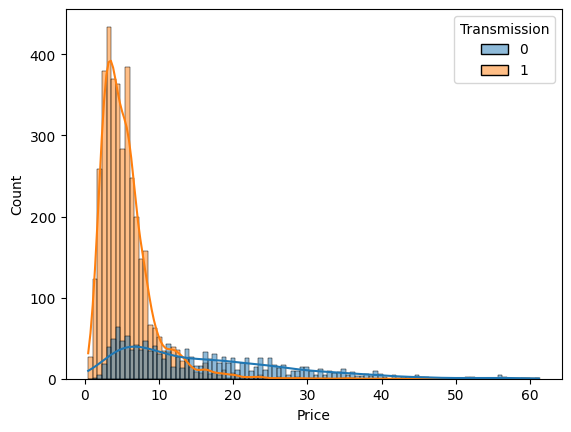

In [51]:
### histplot 이용 --> Price 컬럼과 Transmission 컬럼의 관계 확인
sns.histplot(data=cleaned_df_labels, x='Price', hue='Transmission', kde=True)
plt.show()

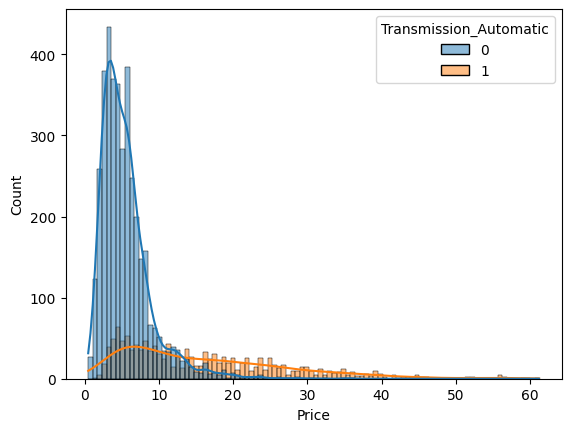

In [52]:
### histplot 이용 --> Price 컬럼과 Transmission 컬럼의 관계 확인
sns.histplot(data=cleaned_df_dummies, x='Price', hue='Transmission_Automatic', kde=True)
plt.show()

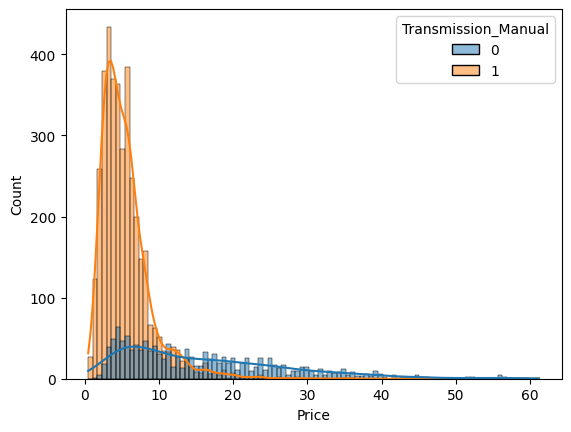

In [53]:
### histplot 이용 --> Price 컬럼과 Transmission 컬럼의 관계 확인
sns.histplot(data=cleaned_df_dummies, x='Price', hue='Transmission_Manual', kde=True)
plt.show()

### 중고차 가격과 Fuel_Type 관계 분석

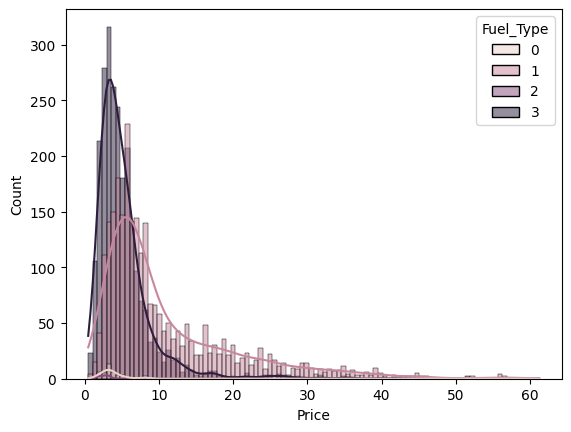

In [54]:
### histplot 이용 --> Price 컬럼과 Fuel_Type 컬럼의 관계 확인

'''
### Fuel_Type : CNG --> 0, Diesel --> 1, LPG --> 2, Petrol --> 3
'''

sns.histplot(data=cleaned_df_labels, x='Price', hue='Fuel_Type', kde=True)
plt.show()

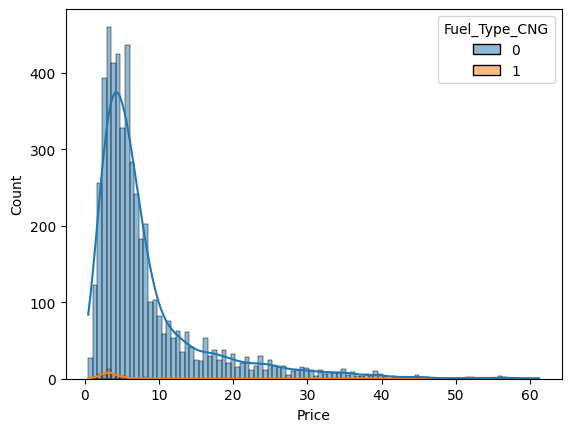

In [55]:
### histplot 이용 --> Price 컬럼과 Fuel_Type 컬럼의 관계 확인
sns.histplot(data=cleaned_df_dummies, x='Price', hue='Fuel_Type_CNG', kde=True)
plt.show()

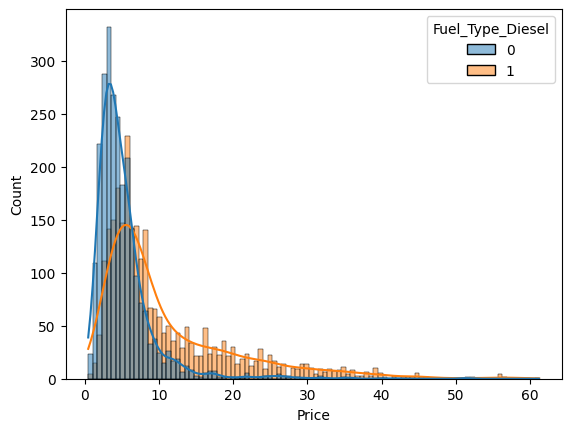

In [56]:
### histplot 이용 --> Price 컬럼과 Fuel_Type 컬럼의 관계 확인
sns.histplot(data=cleaned_df_dummies, x='Price', hue='Fuel_Type_Diesel', kde=True)
plt.show()

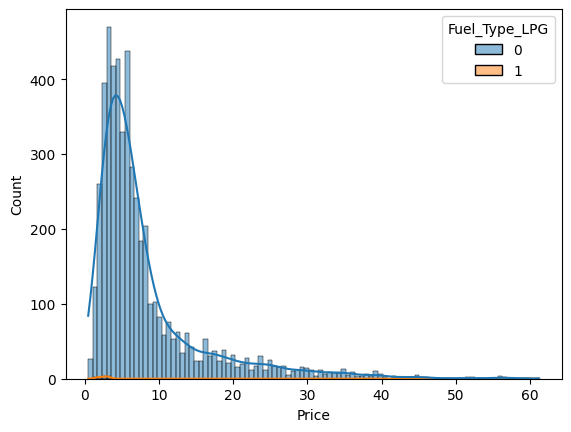

In [57]:
### histplot 이용 --> Price 컬럼과 Fuel_Type 컬럼의 관계 확인
sns.histplot(data=cleaned_df_dummies, x='Price', hue='Fuel_Type_LPG', kde=True)
plt.show()

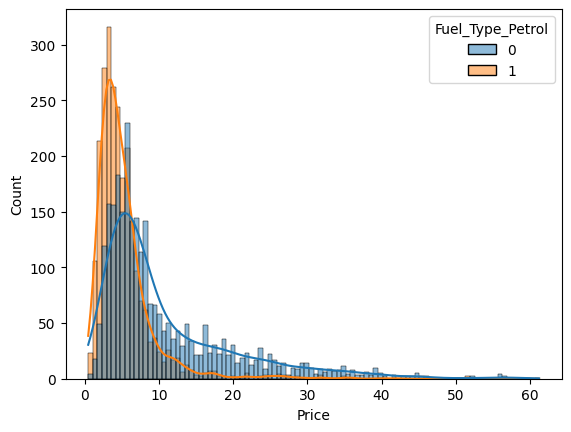

In [58]:
### histplot 이용 --> Price 컬럼과 Fuel_Type 컬럼의 관계 확인
sns.histplot(data=cleaned_df_dummies, x='Price', hue='Fuel_Type_Petrol', kde=True)
plt.show()

#### 중고차 가격과 Kilometers_Driven 관계 분석

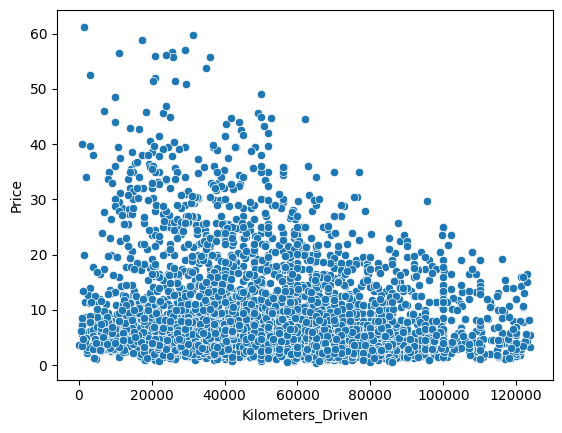

In [59]:
### scatterplot 이용 --> Price 컬럼과 Kilometers_Driven 컬럼 관계 확인
sns.scatterplot(data=cleaned_df_labels, x='Kilometers_Driven', y='Price')
plt.show()

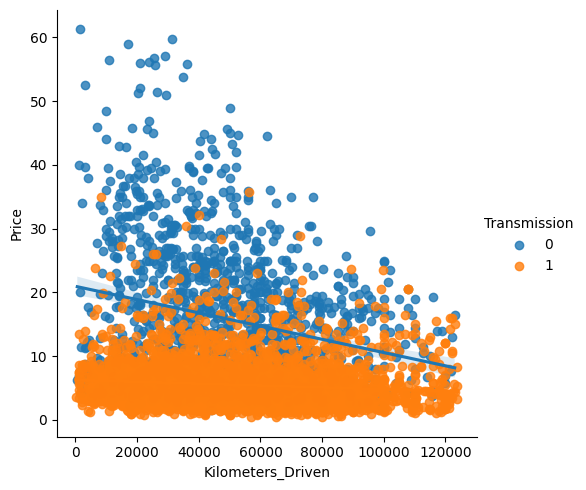

In [60]:
### lmplot 이용 --> Price 컬럼과 Kilometers_Driven 컬럼 관계 확인
sns.lmplot(data=cleaned_df_labels, x='Kilometers_Driven', y='Price', hue='Transmission')
plt.show()

In [61]:
cleaned_df_labels.loc[cleaned_df_labels.Transmission==0, ['Kilometers_Driven', 'Price']].corr()

,Kilometers_Driven,Price
Kilometers_Driven,1.000000,-0.232717
Price,-0.232717,1.000000


#### 중고차 가격과 Location 관계 분석

In [62]:
### cleaned_df_dummies --> 컬럼의 종류 확인
cleaned_df_dummies.columns

Index(['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price', 'Name_Audi', 'Name_BMW', 'Name_Chevrolet', 'Name_Datsun',
       'Name_Fiat', 'Name_Force', 'Name_Ford', 'Name_Honda', 'Name_Hyundai',
       'Name_ISUZU', 'Name_Jaguar', 'Name_Jeep', 'Name_Land', 'Name_Mahindra',
       'Name_Maruti', 'Name_Mercedes-Benz', 'Name_Mini', 'Name_Mitsubishi',
       'Name_Nissan', 'Name_Renault', 'Name_Skoda', 'Name_Tata', 'Name_Toyota',
       'Name_Volkswagen', 'Name_Volvo', 'Location_Ahmedabad',
       'Location_Bangalore', 'Location_Chennai', 'Location_Coimbatore',
       'Location_Delhi', 'Location_Hyderabad', 'Location_Jaipur',
       'Location_Kochi', 'Location_Kolkata', 'Location_Mumbai',
       'Location_Pune', 'Fuel_Type_CNG', 'Fuel_Type_Diesel', 'Fuel_Type_LPG',
       'Fuel_Type_Petrol', 'Transmission_Automatic', 'Transmission_Manual'],
      dtype='object')

Location_Ahmedabad 컬럼


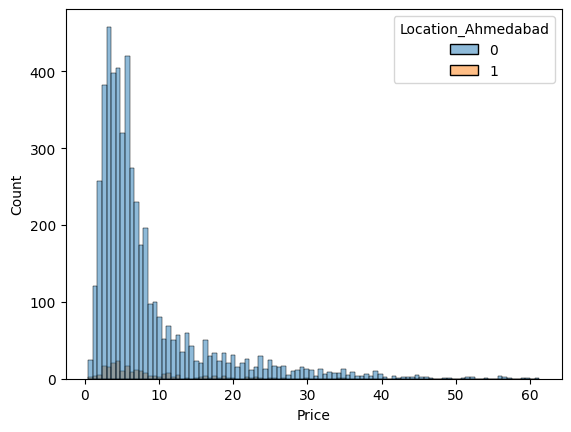

--------------------------------------------------------------------------------
Location_Bangalore 컬럼


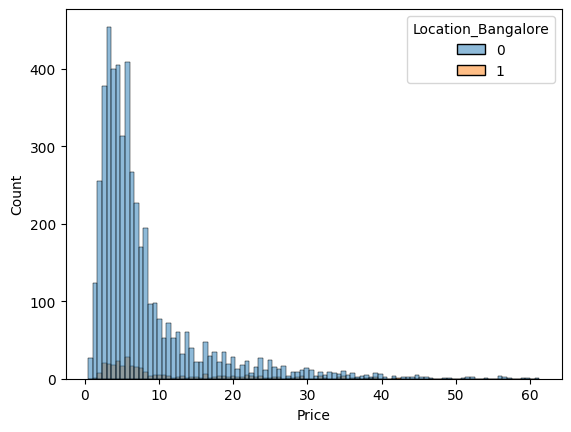

--------------------------------------------------------------------------------
Location_Chennai 컬럼


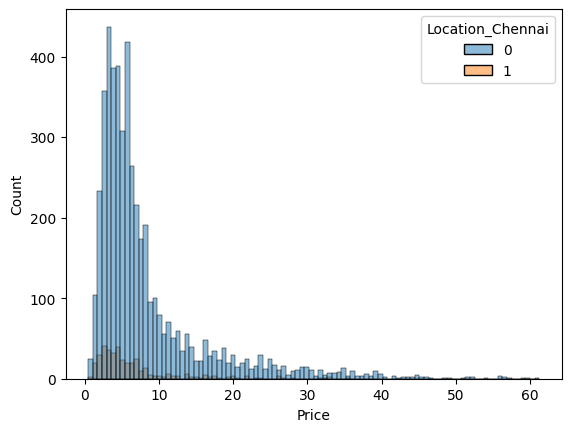

--------------------------------------------------------------------------------
Location_Coimbatore 컬럼


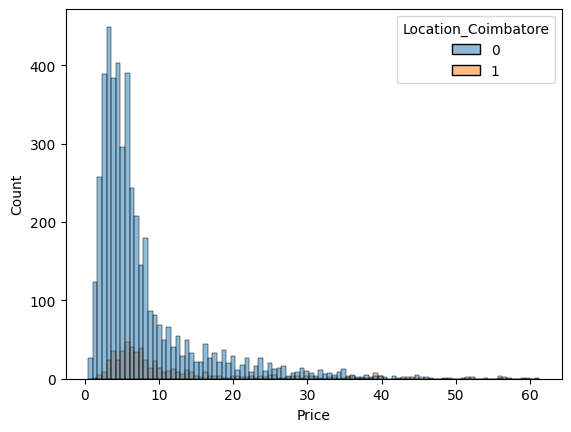

--------------------------------------------------------------------------------
Location_Delhi 컬럼


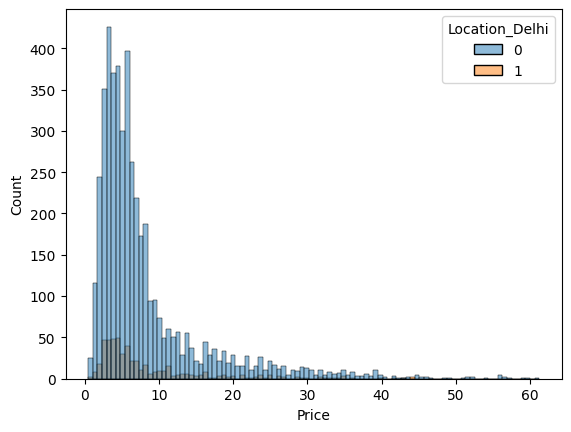

--------------------------------------------------------------------------------
Location_Hyderabad 컬럼


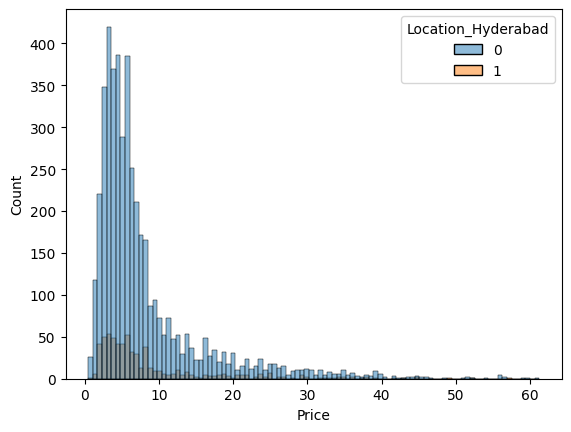

--------------------------------------------------------------------------------
Location_Jaipur 컬럼


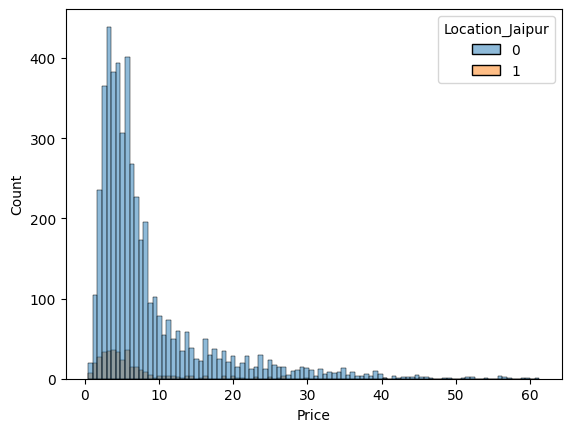

--------------------------------------------------------------------------------
Location_Kochi 컬럼


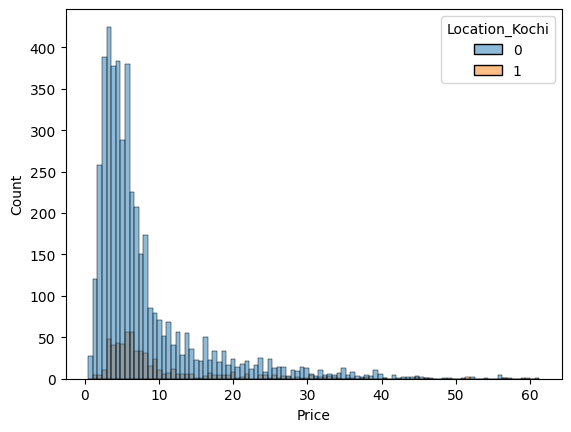

--------------------------------------------------------------------------------
Location_Kolkata 컬럼


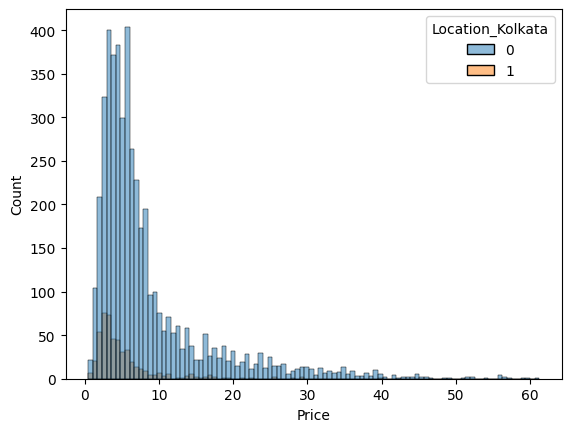

--------------------------------------------------------------------------------
Location_Mumbai 컬럼


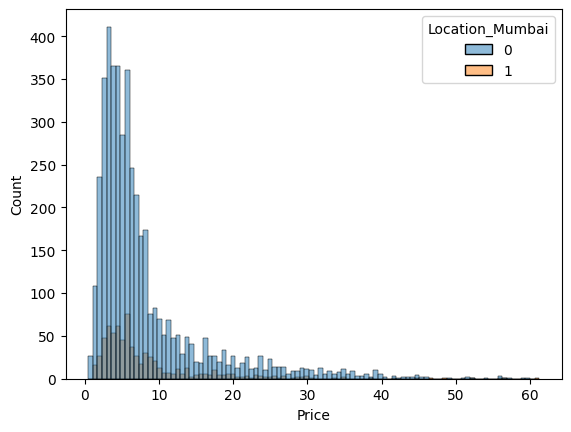

--------------------------------------------------------------------------------
Location_Pune 컬럼


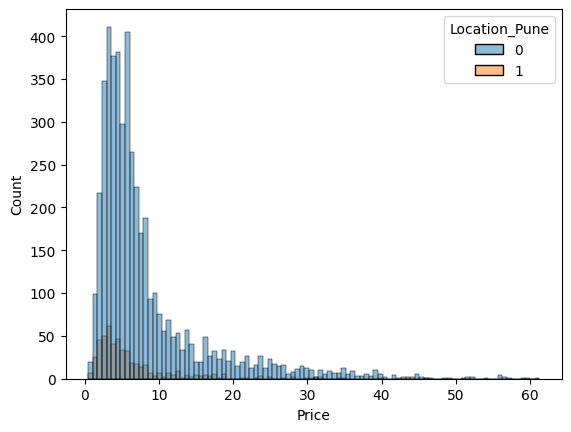

In [63]:
### Location 관련 컬럼 --> Price 컬럼과 Location 컬럼의 관계 확인 --> histplot() 이용

'''
'Location_Ahmedabad',
'Location_Bangalore', 'Location_Chennai', 'Location_Coimbatore',
'Location_Delhi', 'Location_Hyderabad', 'Location_Jaipur',
'Location_Kochi', 'Location_Kolkata', 'Location_Mumbai',
'Location_Pune'
'''

# Location_Ahmedabad 컬럼
print('Location_Ahmedabad 컬럼')
sns.histplot(data=cleaned_df_dummies, x='Price', hue='Location_Ahmedabad')
plt.show()

print('-'*80)

# Location_Bangalore 컬럼
print('Location_Bangalore 컬럼')
sns.histplot(data=cleaned_df_dummies, x='Price', hue='Location_Bangalore')
plt.show()

print('-'*80)

# Location_Chennai 컬럼
print('Location_Chennai 컬럼')
sns.histplot(data=cleaned_df_dummies, x='Price', hue='Location_Chennai')
plt.show()

print('-'*80)

# Location_Coimbatore 컬럼
print('Location_Coimbatore 컬럼')
sns.histplot(data=cleaned_df_dummies, x='Price', hue='Location_Coimbatore')
plt.show()

print('-'*80)

# Location_Delhi 컬럼
print('Location_Delhi 컬럼')
sns.histplot(data=cleaned_df_dummies, x='Price', hue='Location_Delhi')
plt.show()

print('-'*80)

# Location_Hyderabad 컬럼
print('Location_Hyderabad 컬럼')
sns.histplot(data=cleaned_df_dummies, x='Price', hue='Location_Hyderabad')
plt.show()

print('-'*80)

# Location_Jaipur 컬럼
print('Location_Jaipur 컬럼')
sns.histplot(data=cleaned_df_dummies, x='Price', hue='Location_Jaipur')
plt.show()

print('-'*80)

# Location_Kochi 컬럼
print('Location_Kochi 컬럼')
sns.histplot(data=cleaned_df_dummies, x='Price', hue='Location_Kochi')
plt.show()

print('-'*80)

# Location_Kolkata 컬럼
print('Location_Kolkata 컬럼')
sns.histplot(data=cleaned_df_dummies, x='Price', hue='Location_Kolkata')
plt.show()

print('-'*80)

# Location_Mumbai 컬럼
print('Location_Mumbai 컬럼')
sns.histplot(data=cleaned_df_dummies, x='Price', hue='Location_Mumbai')
plt.show()

print('-'*80)

# Location_Pune 컬럼
print('Location_Pune 컬럼')
sns.histplot(data=cleaned_df_dummies, x='Price', hue='Location_Pune')
plt.show()

#### 중고차 가격과 Name의 관계 분석

In [64]:
### Name과 연관된 컬럼 추출

cleaned_df_dummies.columns

'''
'Name_Audi', 'Name_BMW', 'Name_Chevrolet', 'Name_Datsun',
'Name_Fiat', 'Name_Force', 'Name_Ford', 'Name_Honda', 'Name_Hyundai',
'Name_ISUZU', 'Name_Jaguar', 'Name_Jeep', 'Name_Land', 'Name_Mahindra',
'Name_Maruti', 'Name_Mercedes-Benz', 'Name_Mini', 'Name_Mitsubishi',
'Name_Nissan', 'Name_Renault', 'Name_Skoda', 'Name_Tata', 'Name_Toyota',
'Name_Volkswagen', 'Name_Volvo'
'''

"\n'Name_Audi', 'Name_BMW', 'Name_Chevrolet', 'Name_Datsun',\n'Name_Fiat', 'Name_Force', 'Name_Ford', 'Name_Honda', 'Name_Hyundai',\n'Name_ISUZU', 'Name_Jaguar', 'Name_Jeep', 'Name_Land', 'Name_Mahindra',\n'Name_Maruti', 'Name_Mercedes-Benz', 'Name_Mini', 'Name_Mitsubishi',\n'Name_Nissan', 'Name_Renault', 'Name_Skoda', 'Name_Tata', 'Name_Toyota',\n'Name_Volkswagen', 'Name_Volvo'\n"

Name_Audi 컬럼


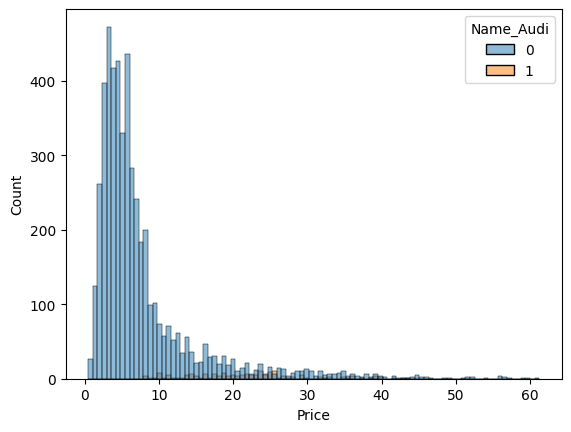

--------------------------------------------------------------------------------
Name_BMW 컬럼


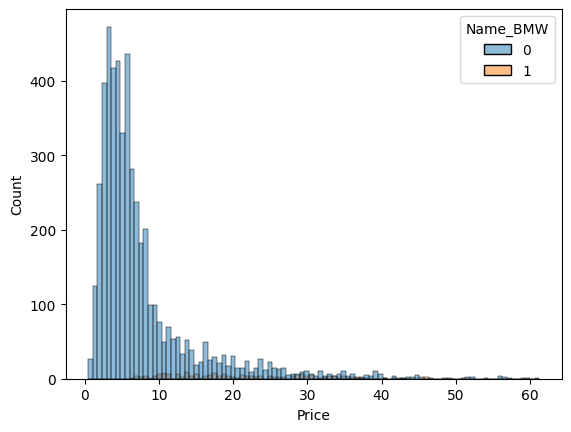

--------------------------------------------------------------------------------
Name_Chevrolet 컬럼


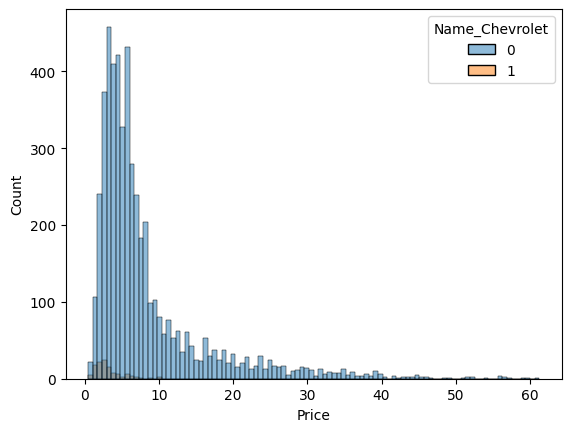

--------------------------------------------------------------------------------
Name_Datsun 컬럼


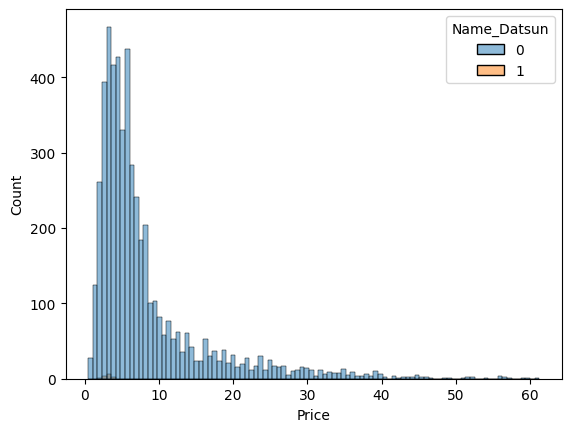

--------------------------------------------------------------------------------
Name_Fiat 컬럼


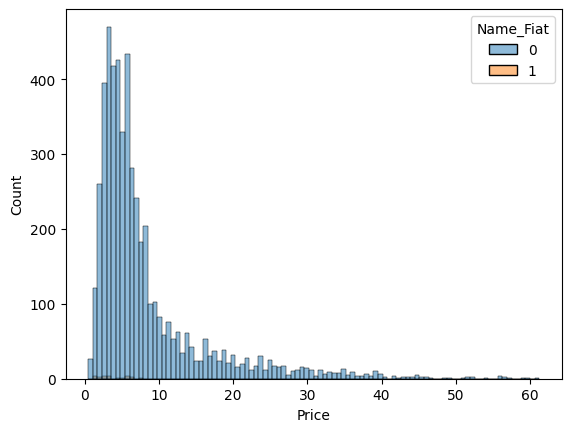

--------------------------------------------------------------------------------
Name_Force 컬럼


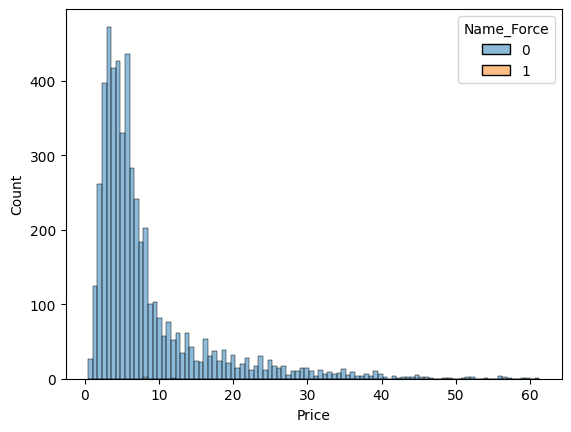

--------------------------------------------------------------------------------
Name_Ford 컬럼


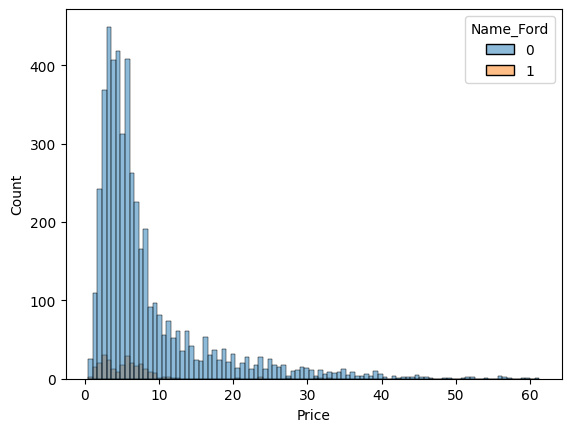

--------------------------------------------------------------------------------
Name_Honda 컬럼


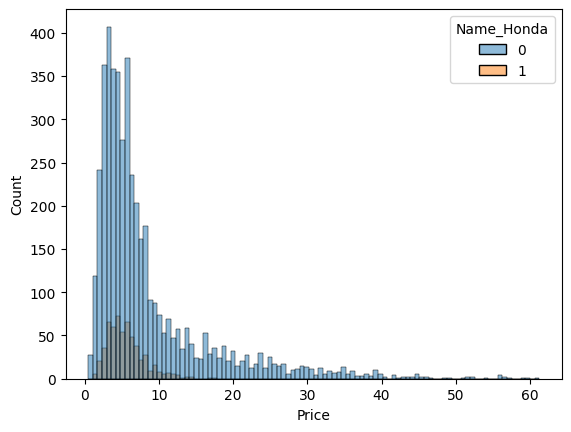

--------------------------------------------------------------------------------
Name_Hyundai 컬럼


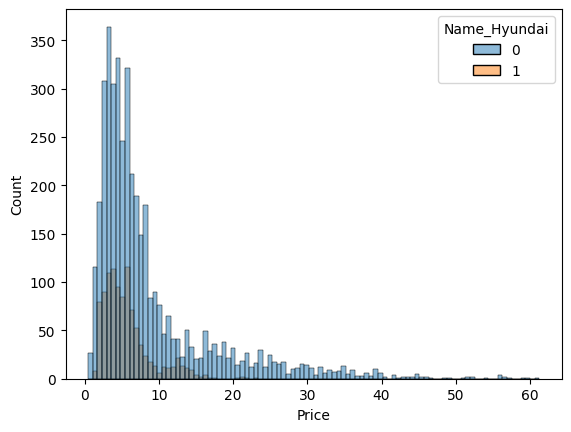

--------------------------------------------------------------------------------
Name_Jaguar 컬럼


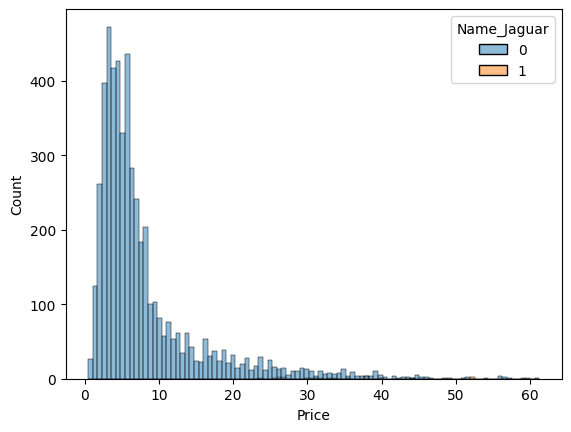

--------------------------------------------------------------------------------
Name_Jeep 컬럼


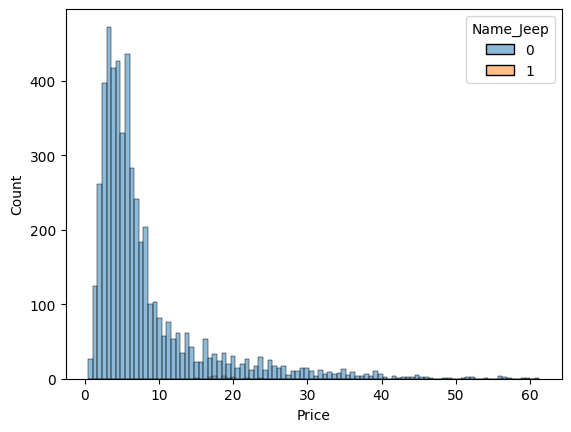

--------------------------------------------------------------------------------
Name_Land 컬럼


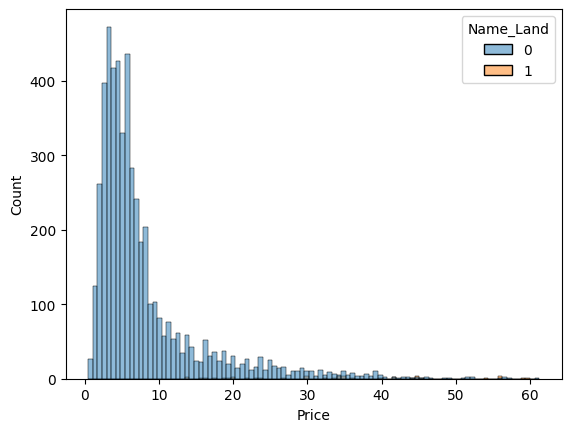

--------------------------------------------------------------------------------
Name_Mahindra 컬럼


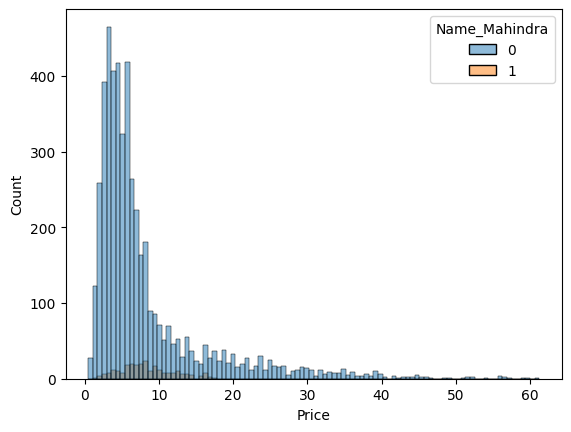

--------------------------------------------------------------------------------
Name_Maruti 컬럼


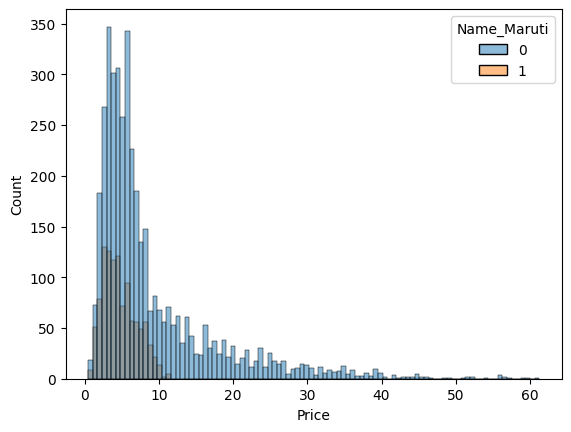

--------------------------------------------------------------------------------
Name_Mercedes-Benz 컬럼


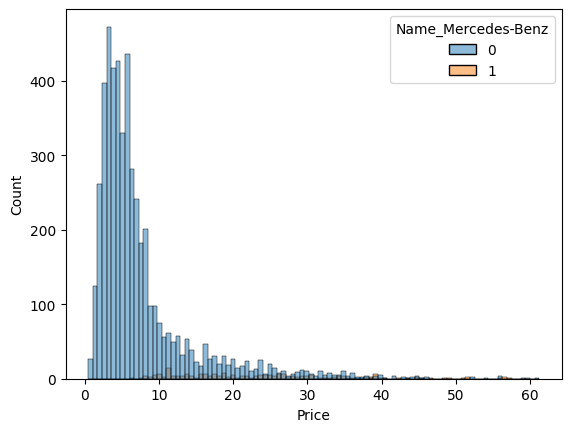

--------------------------------------------------------------------------------
Name_Mini 컬럼


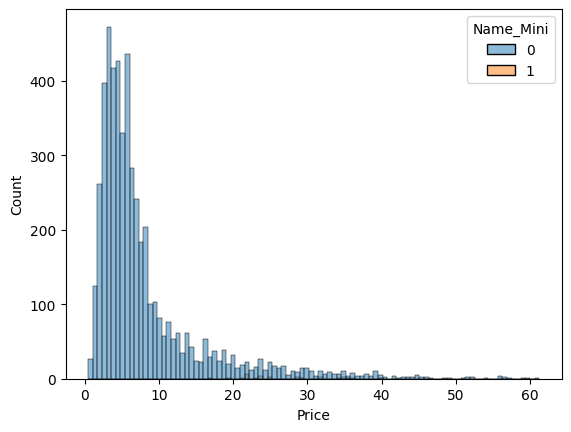

--------------------------------------------------------------------------------
Name_Mitsubishi 컬럼


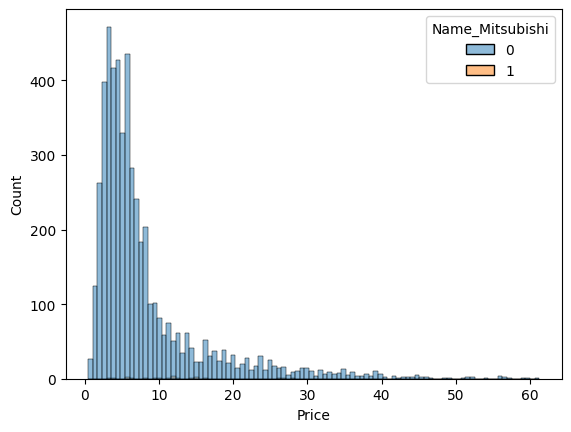

--------------------------------------------------------------------------------
Name_Nissan 컬럼


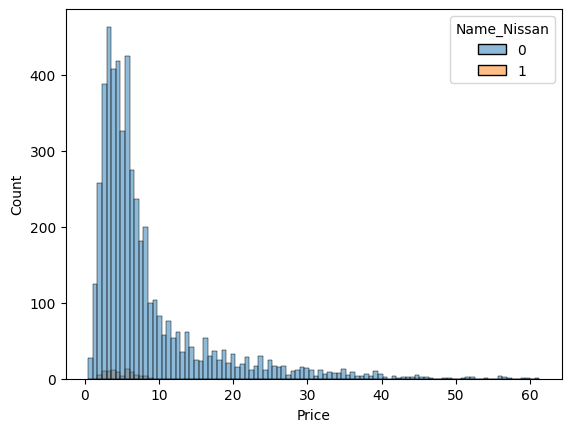

--------------------------------------------------------------------------------
Name_Renault 컬럼


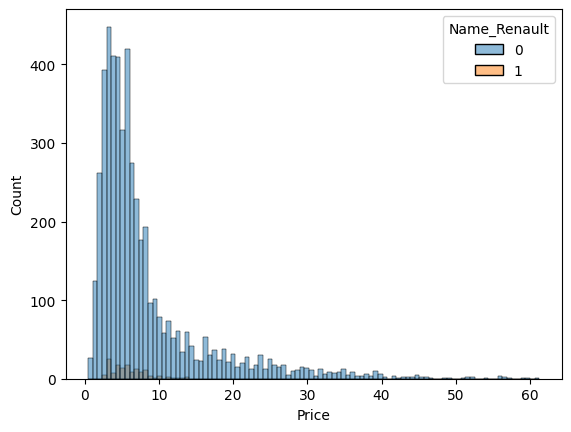

--------------------------------------------------------------------------------
Name_Skoda 컬럼


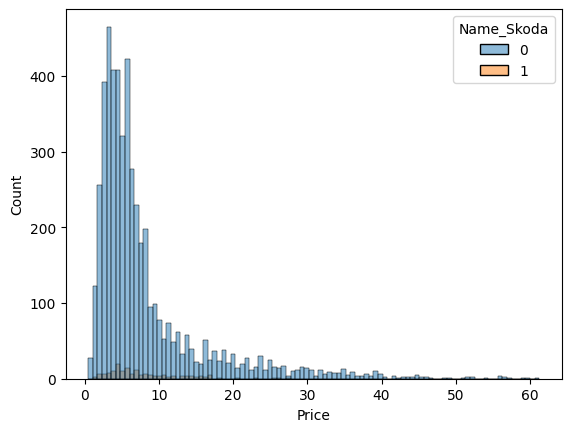

--------------------------------------------------------------------------------
Name_Tata 컬럼


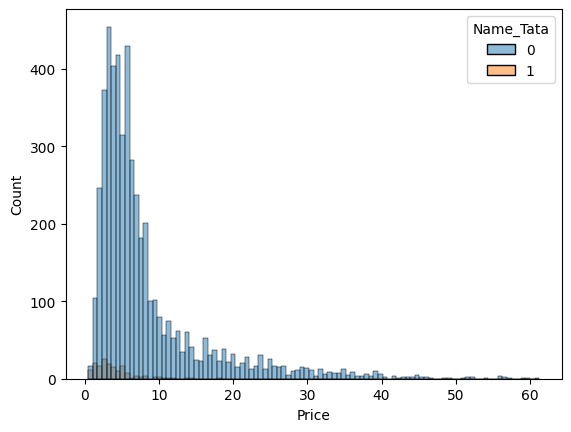

--------------------------------------------------------------------------------
Name_Toyota 컬럼


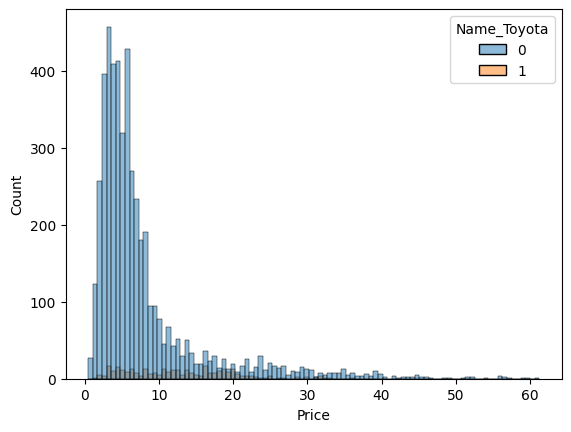

--------------------------------------------------------------------------------
Name_Volkswagen 컬럼


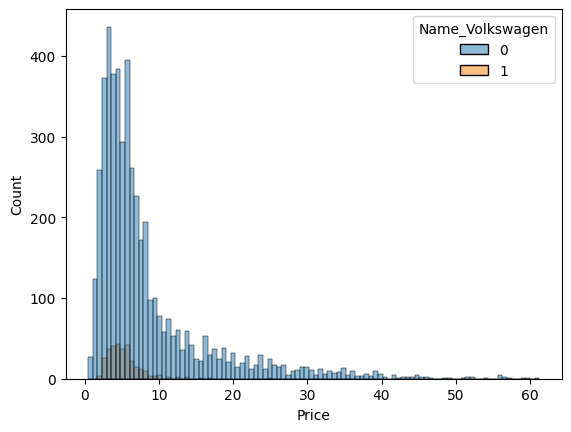

--------------------------------------------------------------------------------
Name_Volvo 컬럼


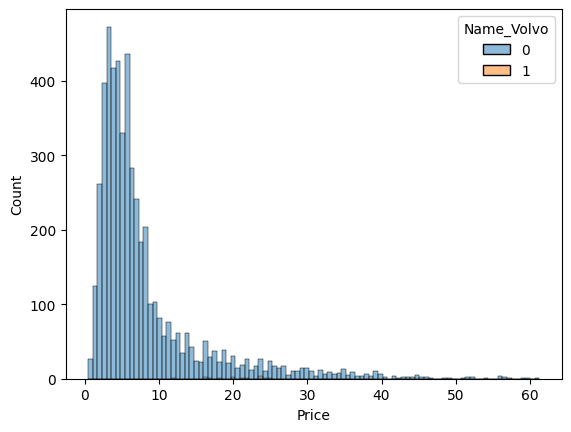

In [65]:
### Price 컬럼과 Name 컬럼의 관계 확인

# Name_Audi 컬럼
print('Name_Audi 컬럼')
sns.histplot(data=cleaned_df_dummies, x='Price', hue='Name_Audi')
plt.show()

print('-'*80)

# Name_BMW 컬럼
print('Name_BMW 컬럼')
sns.histplot(data=cleaned_df_dummies, x='Price', hue='Name_BMW')
plt.show()

print('-'*80)

# Name_Chevrolet 컬럼
print('Name_Chevrolet 컬럼')
sns.histplot(data=cleaned_df_dummies, x='Price', hue='Name_Chevrolet')
plt.show()

print('-'*80)

# Name_Datsun 컬럼
print('Name_Datsun 컬럼')
sns.histplot(data=cleaned_df_dummies, x='Price', hue='Name_Datsun')
plt.show()

print('-'*80)

# Name_Fiat 컬럼
print('Name_Fiat 컬럼')
sns.histplot(data=cleaned_df_dummies, x='Price', hue='Name_Fiat')
plt.show()

print('-'*80)

# Name_Force 컬럼
print('Name_Force 컬럼')
sns.histplot(data=cleaned_df_dummies, x='Price', hue='Name_Force')
plt.show()

print('-'*80)

# Name_Ford 컬럼
print('Name_Ford 컬럼')
sns.histplot(data=cleaned_df_dummies, x='Price', hue='Name_Ford')
plt.show()

print('-'*80)

# Name_Honda 컬럼
print('Name_Honda 컬럼')
sns.histplot(data=cleaned_df_dummies, x='Price', hue='Name_Honda')
plt.show()

print('-'*80)

# Name_Hyundai 컬럼
print('Name_Hyundai 컬럼')
sns.histplot(data=cleaned_df_dummies, x='Price', hue='Name_Hyundai')
plt.show()

print('-'*80)

# Name_Jaguar 컬럼
print('Name_Jaguar 컬럼')
sns.histplot(data=cleaned_df_dummies, x='Price', hue='Name_Jaguar')
plt.show()

print('-'*80)

# Name_Jeep 컬럼
print('Name_Jeep 컬럼')
sns.histplot(data=cleaned_df_dummies, x='Price', hue='Name_Jeep')
plt.show()

print('-'*80)

# Name_Land 컬럼
print('Name_Land 컬럼')
sns.histplot(data=cleaned_df_dummies, x='Price', hue='Name_Land')
plt.show()

print('-'*80)

# Name_Mahindra 컬럼
print('Name_Mahindra 컬럼')
sns.histplot(data=cleaned_df_dummies, x='Price', hue='Name_Mahindra')
plt.show()

print('-'*80)

# Name_Maruti 컬럼
print('Name_Maruti 컬럼')
sns.histplot(data=cleaned_df_dummies, x='Price', hue='Name_Maruti')
plt.show()

print('-'*80)

# Name_Mercedes-Benz 컬럼
print('Name_Mercedes-Benz 컬럼')
sns.histplot(data=cleaned_df_dummies, x='Price', hue='Name_Mercedes-Benz')
plt.show()

print('-'*80)

# Name_Mini 컬럼
print('Name_Mini 컬럼')
sns.histplot(data=cleaned_df_dummies, x='Price', hue='Name_Mini')
plt.show()

print('-'*80)

# Name_Mitsubishi 컬럼
print('Name_Mitsubishi 컬럼')
sns.histplot(data=cleaned_df_dummies, x='Price', hue='Name_Mitsubishi')
plt.show()

print('-'*80)

# Name_Nissan 컬럼
print('Name_Nissan 컬럼')
sns.histplot(data=cleaned_df_dummies, x='Price', hue='Name_Nissan')
plt.show()

print('-'*80)

# Name_Renault 컬럼
print('Name_Renault 컬럼')
sns.histplot(data=cleaned_df_dummies, x='Price', hue='Name_Renault')
plt.show()

print('-'*80)

# Name_Skoda 컬럼
print('Name_Skoda 컬럼')
sns.histplot(data=cleaned_df_dummies, x='Price', hue='Name_Skoda')
plt.show()

print('-'*80)

# Name_Tata 컬럼
print('Name_Tata 컬럼')
sns.histplot(data=cleaned_df_dummies, x='Price', hue='Name_Tata')
plt.show()

print('-'*80)

# Name_Toyota 컬럼
print('Name_Toyota 컬럼')
sns.histplot(data=cleaned_df_dummies, x='Price', hue='Name_Toyota')
plt.show()

print('-'*80)

# Name_Volkswagen 컬럼
print('Name_Volkswagen 컬럼')
sns.histplot(data=cleaned_df_dummies, x='Price', hue='Name_Volkswagen')
plt.show()

print('-'*80)

# Name_Volvo 컬럼
print('Name_Volvo 컬럼')
sns.histplot(data=cleaned_df_dummies, x='Price', hue='Name_Volvo')
plt.show()

#### 중고차 가격과 관련성이 적은 컬럼 제거

In [69]:
### 데이터(1) : cleaned_df_dummies 

# 제거 전 전체 컬럼 확인
print(cleaned_df_dummies.columns)

print('-'*80)

# 제거 대상 컬럼 :
columns = ['Seats', 'Location_Ahmedabad', 
           'Location_Bangalore', 'Location_Chennai', 'Location_Coimbatore', 
           'Location_Delhi', 'Location_Hyderabad', 'Location_Jaipur', 
           'Location_Kochi', 'Location_Kolkata', 'Location_Mumbai', 
           'Location_Pune', 'Engine']
    
# 관련성이 적은 컬럼 제거 --> drop()
cleaned_df_dummies = cleaned_df_dummies.drop(columns=columns)

# 결과 확인하기
cleaned_df_dummies

Index(['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price', 'Name_Audi', 'Name_BMW', 'Name_Chevrolet', 'Name_Datsun',
       'Name_Fiat', 'Name_Force', 'Name_Ford', 'Name_Honda', 'Name_Hyundai',
       'Name_ISUZU', 'Name_Jaguar', 'Name_Jeep', 'Name_Land', 'Name_Mahindra',
       'Name_Maruti', 'Name_Mercedes-Benz', 'Name_Mini', 'Name_Mitsubishi',
       'Name_Nissan', 'Name_Renault', 'Name_Skoda', 'Name_Tata', 'Name_Toyota',
       'Name_Volkswagen', 'Name_Volvo', 'Location_Ahmedabad',
       'Location_Bangalore', 'Location_Chennai', 'Location_Coimbatore',
       'Location_Delhi', 'Location_Hyderabad', 'Location_Jaipur',
       'Location_Kochi', 'Location_Kolkata', 'Location_Mumbai',
       'Location_Pune', 'Fuel_Type_CNG', 'Fuel_Type_Diesel', 'Fuel_Type_LPG',
       'Fuel_Type_Petrol', 'Transmission_Automatic', 'Transmission_Manual'],
      dtype='object')
--------------------------------------------------------------------------------


,Year,Kilometers_Driven,Mileage,Power,Price,Name_Audi,Name_BMW,Name_Chevrolet,Name_Datsun,Name_Fiat,...,Name_Tata,Name_Toyota,Name_Volkswagen,Name_Volvo,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual
0,2010,72000,26.60,58.16,1.75,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,2015,41000,19.67,126.20,12.50,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,2011,46000,18.20,88.70,4.50,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,2012,87000,20.77,88.76,6.00,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,2013,40670,15.20,140.80,17.74,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5176,2014,27365,28.40,74.00,4.75,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
5177,2015,100000,24.40,71.00,4.00,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
5178,2012,55000,14.00,112.00,2.90,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
5179,2013,46000,18.90,67.10,2.65,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [74]:
### 데이터(2) : cleaned_df_labels

# 제거 전 컬럼 확인
print(cleaned_df_labels.columns)

print('-'*80)

# 제거 대상 컬럼 : Engine, Seats
columns = ['Engine', 'Seats']

# 관련성이 적은 컬럼 제거 --> drop()
cleaned_df_labels = cleaned_df_labels.drop(columns=columns)

# 결과 확인하기
cleaned_df_labels

Index(['Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Mileage',
       'Engine', 'Power', 'Seats', 'Price'],
      dtype='object')
--------------------------------------------------------------------------------


,Year,Kilometers_Driven,Fuel_Type,Transmission,Mileage,Power,Price
0,2010,72000,0,1,26.60,58.16,1.75
1,2015,41000,1,1,19.67,126.20,12.50
2,2011,46000,3,1,18.20,88.70,4.50
3,2012,87000,1,1,20.77,88.76,6.00
4,2013,40670,1,0,15.20,140.80,17.74
...,...,...,...,...,...,...,...
5176,2014,27365,1,1,28.40,74.00,4.75
5177,2015,100000,1,1,24.40,71.00,4.00
5178,2012,55000,1,1,14.00,112.00,2.90
5179,2013,46000,3,1,18.90,67.10,2.65


### 결과 저장하기

In [75]:
### 전차리와 탐색이 끝난 결과 --> csv 파일로 저장하기

# file 경로 설정하기
file_name_dummies = 'used_car_preprocessed_dummies.csv'
file_name_labels = 'used_car_preprocessed_labels.csv'

# df.to_csv(file_name, index=False)
cleaned_df_dummies.to_csv(file_name_dummies, index=False)
cleaned_df_labels.to_csv(file_name_labels, index=False)